## Random Forest and Gradient Boosting Models

### Part 1: Random Forest

- uses 7 selected features from EDA process


Cross-Validation MSE Scores: [0.32100163 0.3785556  0.46903644 0.94074236 0.30314081]
Average Cross-Validation MSE: 0.482495367569978

Random Forest Model Performance
-------------------------------
Mean Squared Error: 0.3170461386037582
Mean Absolute Error: 0.43560538712104346
R^2 Score: 0.6859396971787457


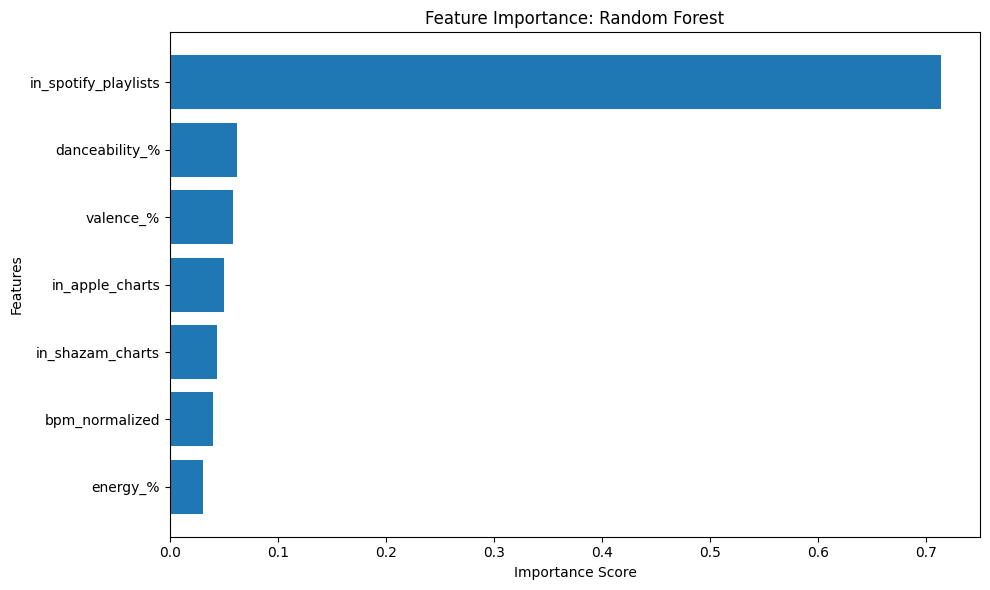

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# load preprocessed data
data = pd.read_csv('preprocessed_popular_spotify_songs.csv')

# select features
features = ['in_spotify_playlists', 'in_apple_charts', 'in_shazam_charts',
            'danceability_%', 'bpm_normalized', 'valence_%', 'energy_%']

# define target
target = 'streams'

# input data
X = data[features]

# log-transform target variable for distribution
y = np.log1p(data[target])

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# perform k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_model, X, y, cv=kf, scoring='neg_mean_squared_error')
print("Cross-Validation MSE Scores:", -cv_scores)
print("Average Cross-Validation MSE:", -np.mean(cv_scores))

# train the model on the full training data
rf_model.fit(X_train, y_train)

# predict on the test set
y_pred = rf_model.predict(X_test)

# evaluate the model, print metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nRandom Forest Model Performance")
print("-------------------------------")
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

# determine plot feature importance
importance = rf_model.feature_importances_
sorted_indices = np.argsort(importance)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importance: Random Forest')
plt.barh(range(X.shape[1]), importance[sorted_indices], align='center')
plt.yticks(range(X.shape[1]), np.array(features)[sorted_indices])
plt.gca().invert_yaxis()
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

### Part 2: Gradient Boosting

Fitting 3 folds for each of 486 candidates, totalling 1458 fits

Best Gradient Boosting Model Performance
----------------------------------------
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 150}
Mean Squared Error: 0.3321462544732181
Mean Absolute Error: 0.4569566581751282
R^2 Score: 0.6709817892115222


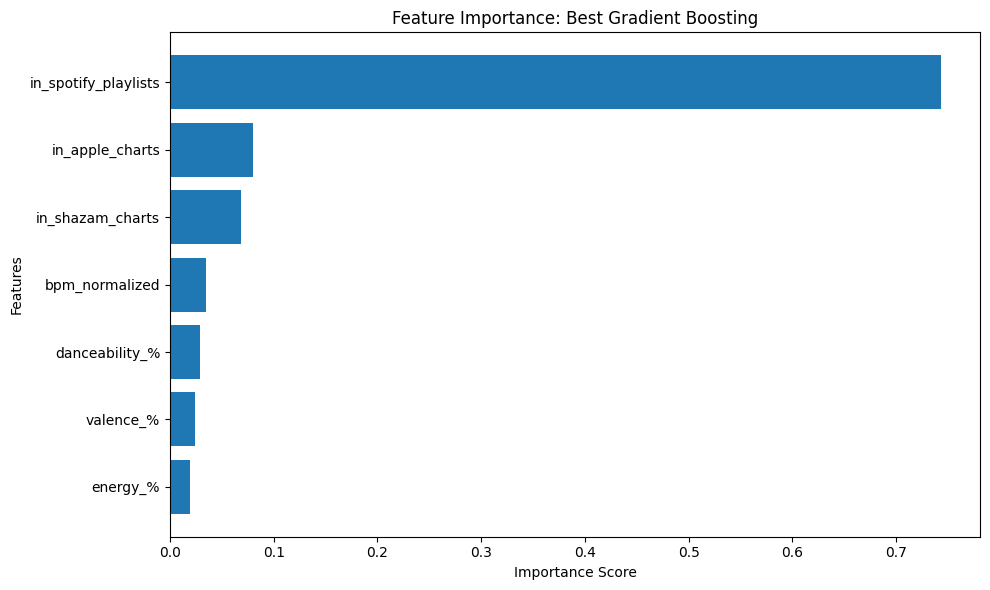

In [2]:
# define grid search parameters
param_grid = {
    'n_estimators': [100, 150, 250],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4, 8],
    'learning_rate': [0.001, 0.02, 0.05]
}

# initialize and fit search parameters
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=param_grid, 
                           cv=3, verbose=1, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

# best estimator from grid search
best_model = grid_search.best_estimator_

# predict on test set with best estimator
y_pred = best_model.predict(X_test)

# evaluate the best model, print metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nBest Gradient Boosting Model Performance")
print("----------------------------------------")
print("Best Parameters:", grid_search.best_params_)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

# determine plot feature importance
importance = best_model.feature_importances_
sorted_indices = np.argsort(importance)[::-1]
plt.figure(figsize=(10, 6))
plt.title('Feature Importance: Best Gradient Boosting')
plt.barh(range(X.shape[1]), importance[sorted_indices], align='center')
plt.yticks(range(X.shape[1]), np.array(features)[sorted_indices])
plt.gca().invert_yaxis()
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()